In [4]:
import pandas as pd

#df = pd.read_csv('/home/jmocel/trelium/rapids/data/processed/features/all_participants/all_sensor_features_clean_withtarget.csv')
df = pd.read_csv('/home/jmocel/trelium/rapids/data/data/processed/features/all_participants/all_sensor_features_clean_withtarget_all_foravi.csv')

#divide dataset between exp and wait group 
df_wait = df.loc[df['exp_group']=='WL',:]
df_treat = df.loc[df['exp_group']=='EG',:]
#group by pre-mid-post and apply scaling to each group 
excluded_cols = ['exp_group','Unnamed: 0','HAMA','OASIS','BAI','pid','segment_end_date','local_segment','local_segment_label','local_segment_start_datetime','local_segment_end_datetime','phone_data_yield_rapids_ratiovalidyieldedminutes','phone_data_yield_rapids_ratiovalidyieldedhours']
df_treat = df_treat.drop(columns=excluded_cols)
df_treat_pre = df_treat.loc[df_treat['sensing_period'] == 'PRE',:].drop(columns = ['sensing_period'])
df_treat_pre = df_treat_pre.transform(lambda x: (x - x.mean()) / x.std())
df_treat_mid = df_treat.loc[df_treat['sensing_period'] == 'MID',:].drop(columns = ['sensing_period'])
df_treat_mid = df_treat_mid.transform(lambda x: (x - x.mean()) / x.std())
df_treat_post = df_treat.loc[df_treat['sensing_period'] == 'POST',:].drop(columns = ['sensing_period'])
df_treat_post = df_treat_post.transform(lambda x: (x - x.mean()) / x.std())
#df_treat = df_treat.groupby(by='sensing_period').transform(lambda x: (x - x.mean()) / x.std())

In [3]:
from statsmodels.stats.weightstats import ztest as ztest
#from statsmodels.stats.weightstats.CompareMeans import ztest_ind as ztest_uneq

#perform two sample z-test
results = []
for i in df_treat_pre.columns:
    statistic = ztest(df_treat_pre[i], df_treat_post[i], value=0, alternative='two-sided')
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)



In [4]:
results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])

In [5]:
results_df.loc[results_df['pvalue'] <= 0.05,]
results_df['pvalue'].min()

0.9999999999997498

## Feature distribution differences between responders/nonresponders

In [8]:
#divide now the dataset according to responder/nonresponder
responders_df = df_treat.loc[df_treat['RCI_responder'] == 1,:].drop(columns = ['sensing_period'])
#responders_df = responders_df.transform(lambda x: (x - x.mean()) / x.std())
nonresponders_df = df_treat.loc[df_treat['RCI_responder'] == 0,:].drop(columns = ['sensing_period'])
#nonresponders_df = nonresponders_df.transform(lambda x: (x - x.mean()) / x.std())

In [10]:
from statsmodels.stats.weightstats import ztest as ztest
#from statsmodels.stats.weightstats.CompareMeans import ztest_ind as ztest_uneq

#perform two sample z-test
results = []
for i in responders_df.columns:
    statistic = ztest(responders_df[i], nonresponders_df[i], value=0, alternative='two-sided')
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)

results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])

results_df.loc[results_df['pvalue'] <= 0.05,]
results_df['pvalue'].min()

/home/jmocel/.conda/envs/OptimaxSensing/lib/python3.6/site-packages/statsmodels/stats/weightstats.py:746: RuntimeWarning: invalid value encountered in double_scalars
  zstat = (value1 - value2 - diff) / std_diff
/home/jmocel/.conda/envs/OptimaxSensing/lib/python3.6/site-packages/statsmodels/stats/weightstats.py:746: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = (value1 - value2 - diff) / std_diff


0.0

In [9]:
from statsmodels.stats.diagnostic import kstest_normal
kstest_normal(responders_df['phone_accelerometer_rapids_avgmagnitude'])
results = []
for i in responders_df.columns:
    statistic = kstest_normal(responders_df[i])
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)

results_df = pd.DataFrame(results, columns=['name','ks-statistic','pvalue'])

results_df.loc[results_df['pvalue'] >= 0.05,]



TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<AxesSubplot:>

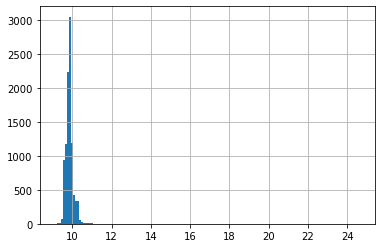

In [10]:
responders_df['phone_accelerometer_rapids_avgmagnitude'].hist(bins = 150)

## Feature distribution differences between PRE and POST for those who underwent treatment, distribution of participant feature means

In [5]:
excluded_cols = [#'Unnamed: 0.1',
                        'Unnamed: 0',
                        "X","Unnamed..0",
                        'progsegment',
                        #'percentage_change_hama','percentage_change_oasis','percentage_change_bai',
                        #'hama_nonclinical_post','oasis_nonclinical_post','bai_nonclinical_post',
                        'OASIS_RCI_responder',
                        'BAI_RCI_responder',
                        'HAMA_RCI_responder',
                        'HAMA','OASIS','BAI',
                        'pid',
                        'segment_end_date',
                        'local_segment',
                        'local_segment_label',
                        'local_segment_start_datetime',
                        'local_segment_end_datetime',
                        'phone_data_yield_rapids_ratiovalidyieldedminutes',
                        'sensing_period',
                        'exp_group']

def average_datasets():

    df1 = pd.read_csv('/home/jmocel/trelium/OPTIMAX-sensing/imputations_0.01_tol/outdata1.csv')
    df_str = df1[excluded_cols]
    df1.drop(columns=excluded_cols, inplace=True)
    df2 = pd.read_csv('/home/jmocel/trelium/OPTIMAX-sensing/imputations_0.01_tol/outdata2.csv').drop(columns=excluded_cols)
    df3 = pd.read_csv('/home/jmocel/trelium/OPTIMAX-sensing/imputations_0.01_tol/outdata3.csv').drop(columns=excluded_cols)
    df4 = pd.read_csv('/home/jmocel/trelium/OPTIMAX-sensing/imputations_0.01_tol/outdata4.csv').drop(columns=excluded_cols)
    df5 = pd.read_csv('/home/jmocel/trelium/OPTIMAX-sensing/imputations_0.01_tol/outdata5.csv').drop(columns=excluded_cols)
    #print(df1.shape == df2.shape == df3.shape == df4.shape  == df5.shape)
    df_tot = df1+df2+df3+df4+df5
    df_tot = df_tot/5
    return pd.concat([df_tot,df_str], join='outer', axis = 1)

In [6]:

def parse_dataset(df, mode = 'treat_subj'):
    #df = pd.read_csv(path)
    #divide dataset between exp and wait group 
    df_wait = df.loc[df['exp_group']=='WL',:]
    df_treat = df.loc[df['exp_group']=='EG',:]
    #group by pre-mid-post and apply scaling to each group 
    excluded_cols = [#'Unnamed: 0.1',
                        'Unnamed: 0',
                        "X","Unnamed..0",
                        'progsegment',
                        #'percentage_change_hama','percentage_change_oasis','percentage_change_bai',
                        #'hama_nonclinical_post','oasis_nonclinical_post','bai_nonclinical_post',
                        'OASIS_RCI_responder',
                        'BAI_RCI_responder',
                        'HAMA_RCI_responder',
                        'HAMA','OASIS','BAI',
                        #'pid',
                        'segment_end_date',
                        'local_segment',
                        'local_segment_label',
                        'local_segment_start_datetime',
                        'local_segment_end_datetime',
                        'phone_data_yield_rapids_ratiovalidyieldedminutes',
                        #'sensing_period',
                        'exp_group']
    if mode == 'treat_subj':
        df_treat = df_treat.drop(columns=excluded_cols)
        return {'df_treat_pre' : df_treat.loc[df_treat['sensing_period'] == 'PRE',:].drop(columns = ['sensing_period']),
                'df_treat_mid' : df_treat.loc[df_treat['sensing_period'] == 'MID',:].drop(columns = ['sensing_period']),
                'df_treat_post' : df_treat.loc[df_treat['sensing_period'] == 'POST',:].drop(columns = ['sensing_period'])}
    elif mode == 'responders':
        return {'df_treat_pre_resp' : df_treat.loc[(df_treat['sensing_period'] == 'PRE') & (df_treat['RCI_responder'] == 1),:].drop(columns = ['sensing_period']),
                'df_treat_pre_nonresp' : df_treat.loc[(df_treat['sensing_period'] == 'PRE') & (df_treat['RCI_responder'] == 0),:].drop(columns = ['sensing_period']),
                'df_treat_responders' : df_treat.loc[df_treat['RCI_responder'] == 1,:].drop(columns = ['sensing_period']),
                'df_treat_nonresponders' : df_treat.loc[df_treat['RCI_responder'] == 0,:].drop(columns = ['sensing_period'])}

    elif mode == 'waitlist':
        return {'df_wait_pre' : df_wait.loc[df_wait['sensing_period'] == 'PRE',:].drop(columns = ['sensing_period']),
                'df_wait_mid' : df_wait.loc[df_wait['sensing_period'] == 'MID',:].drop(columns = ['sensing_period']),
                'df_wait_post' : df_wait.loc[df_wait['sensing_period'] == 'POST',:].drop(columns = ['sensing_period'])}


In [7]:
df_avg = parse_dataset(average_datasets(),mode='treat_subj') #treatment group subjects
means_treat_pre = df_avg['df_treat_pre'].groupby(['pid']).mean()
means_treat_post = df_avg['df_treat_post'].groupby(['pid']).mean()

In [8]:
from statsmodels.stats.diagnostic import kstest_normal
results = []
for i in means_treat_pre.columns:
    statistic = kstest_normal(means_treat_pre[i])
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)

results_df = pd.DataFrame(results, columns=['name','ks-statistic','pvalue'])

results_df.loc[results_df['pvalue'] >= 0.05,]

#If the pvalue is lower than some threshold, e.g. 0.05, then we can reject the Null hypothesis that the sample comes from a normal distribution.


,name,ks-statistic,pvalue
0,phone_accelerometer_rapids_maxmagnitude,0.161441,0.106324
1,phone_accelerometer_rapids_minmagnitude,0.108179,0.654663
2,phone_accelerometer_rapids_avgmagnitude,0.160497,0.112744
4,phone_accelerometer_panda_avgdurationexertiona...,0.144047,0.224636
5,phone_accelerometer_panda_avgdurationnonexerti...,0.152780,0.165235
6,phone_activity_recognition_rapids_count,0.092281,0.854752
7,phone_activity_recognition_rapids_mostcommonac...,0.155729,0.145174
8,phone_activity_recognition_rapids_durationmobile,0.089333,0.888489
9,phone_wifi_visible_rapids_uniquedevices,0.102824,0.730387
10,phone_wifi_visible_rapids_countscansmostunique...,0.157381,0.133940


In [9]:
set(means_treat_pre.columns)- set(means_treat_post.columns)


set()

In [10]:
from statsmodels.stats.weightstats import ttest_ind
#from statsmodels.stats.weightstats.CompareMeans import ztest_ind as ztest_uneq

#perform two sample z-test
results = []
for i in means_treat_pre.columns:
    statistic = ttest_ind(means_treat_pre[i], means_treat_post[i], value=0, alternative='two-sided')
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)


In [11]:
results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])
results_df.loc[results_df['pvalue'] <= 0.05,]
#results_df['pvalue'].min()

,name,z-statistic,pvalue
25,phone_light_rapids_minlux,-2.370328,0.022682


Let's try one sided tests

In [41]:
results = []
for i in means_treat_pre.columns:
    statistic = ttest_ind(means_treat_pre[i], means_treat_post[i], value=0, alternative='smaller')
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)

results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])
results_df.loc[results_df['pvalue'] <= 0.05,]

,name,z-statistic,pvalue
25,phone_light_rapids_minlux,-2.370328,0.011341


 Difference between 
responders/nonresponders
responders/nonresponders when looking only at PRE features 


In [12]:
df_avg = parse_dataset(average_datasets(),mode='responders')
means_resp = df_avg['df_treat_responders'].groupby(['pid']).mean()
means_nonresp = df_avg['df_treat_nonresponders'].groupby(['pid']).mean()

In [13]:
from statsmodels.stats.diagnostic import kstest_normal
results = []
for i in means_resp.columns:
    statistic = kstest_normal(means_resp[i])
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)

results_df = pd.DataFrame(results, columns=['name','ks-statistic','pvalue'])

results_df.loc[results_df['pvalue'] >= 0.05,]

#If the pvalue is lower than some threshold, e.g. 0.05, then we can reject the Null hypothesis that the sample comes from a normal distribution.


/home/jmocel/.conda/envs/SktimeEnv/lib/python3.9/site-packages/statsmodels/stats/_lilliefors.py:279: RuntimeWarning: invalid value encountered in true_divide
  z = (x - x.mean()) / x.std(ddof=1)


,name,ks-statistic,pvalue
0,phone_accelerometer_rapids_maxmagnitude,0.157999,0.494617
1,phone_accelerometer_rapids_minmagnitude,0.122601,0.847236
2,phone_accelerometer_rapids_avgmagnitude,0.108596,0.944060
3,phone_accelerometer_rapids_stdmagnitude,0.182578,0.276435
4,phone_accelerometer_panda_avgdurationexertiona...,0.128435,0.797001
5,phone_accelerometer_panda_avgdurationnonexerti...,0.166280,0.421111
6,phone_activity_recognition_rapids_count,0.115988,0.902717
9,phone_wifi_visible_rapids_uniquedevices,0.177899,0.317970
10,phone_wifi_visible_rapids_countscansmostunique...,0.131488,0.770709
11,phone_battery_rapids_sumdurationdischarge,0.217588,0.090808


In [37]:
from statsmodels.stats.weightstats import ttest_ind
#from statsmodels.stats.weightstats.CompareMeans import ztest_ind as ztest_uneq

#perform two sample z-test
results = []
for i in means_resp.columns:
    statistic = ttest_ind(means_resp[i], means_nonresp[i], value=0, alternative='two-sided')
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)


/home/jmocel/.conda/envs/SktimeEnv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: divide by zero encountered in double_scalars
  tstat = (value1 - value2 - diff) / std_diff


In [15]:
results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])
results_df.loc[results_df['pvalue'] <= 0.05,]
#results_df['pvalue'].min()

,name,z-statistic,pvalue
49,percentage_change_hama,-3.643823,1.356185e-03
50,percentage_change_oasis,-2.823547,9.633736e-03
54,oasis_nonclinical_post,2.077095,4.914724e-02
55,RCI_responder,inf,0.000000e+00
60,OASIS_RCI_responder,5.630996,9.890473e-06
61,BAI_RCI_responder,3.620978,1.434368e-03
62,HAMA_RCI_responder,7.416931,1.532118e-07


In [16]:
#now looking only at pre: 

df_avg = parse_dataset(average_datasets(),mode='responders')
means_resp_pre = df_avg['df_treat_pre_resp'].groupby(['pid']).mean()
means_nonresp_pre = df_avg['df_treat_pre_nonresp'].groupby(['pid']).mean()


#perform two sample t-test
results = []
for i in means_resp_pre.columns:
    statistic = ttest_ind(means_resp_pre[i], means_nonresp_pre[i], value=0, alternative='two-sided')
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)


results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])
results_df.loc[results_df['pvalue'] <= 0.05,]
#results_df['pvalue'].min()

/home/jmocel/.conda/envs/SktimeEnv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: divide by zero encountered in double_scalars
  tstat = (value1 - value2 - diff) / std_diff


,name,z-statistic,pvalue
49,percentage_change_hama,-3.771198,1.052082e-03
50,percentage_change_oasis,-3.098406,5.244627e-03
54,oasis_nonclinical_post,2.262894,3.385510e-02
55,RCI_responder,inf,0.000000e+00
60,OASIS_RCI_responder,7.038855,4.614324e-07
61,BAI_RCI_responder,3.386456,2.655748e-03
62,HAMA_RCI_responder,7.038855,4.614324e-07
64,OASIS,2.472176,2.164038e-02
65,BAI,2.466226,2.192207e-02


Let's try one sided tests

In [35]:
#from scipy.stats import ttest_ind

#responders/nonresponders
results = []
for i in means_resp.columns:
    statistic = ttest_ind(means_resp[i], means_nonresp[i],value=0, alternative='smaller') #the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)

results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])
results_df.loc[results_df['pvalue'] <= 0.05,]

,name,z-statistic,pvalue
49,percentage_change_hama,-3.643823,0.000678
50,percentage_change_oasis,-2.823547,0.004817


In [39]:
#responders/nonresponders now looking only at pre: 

#perform two sample t-test
results = []
for i in means_resp_pre.columns:
    statistic = ttest_ind(means_resp_pre[i], means_nonresp_pre[i], value=0, alternative='smaller')
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)


results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])
results_df.loc[results_df['pvalue'] <= 0.05,]
#results_df['pvalue'].min()

/home/jmocel/.conda/envs/SktimeEnv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:650: RuntimeWarning: divide by zero encountered in double_scalars
  tstat = (value1 - value2 - diff) / std_diff


,name,z-statistic,pvalue
49,percentage_change_hama,-3.771198,0.000526
50,percentage_change_oasis,-3.098406,0.002622



Difference between 
treatment / waitlist at post 
treatment / waitlist at mid 

In [17]:
#now looking at wait/treat at post

df_avg_wait = parse_dataset(average_datasets(),mode='waitlist')
df_avg_treat = parse_dataset(average_datasets(),mode='treat_subj')

means_wait_post = df_avg_wait['df_wait_post'].groupby(['pid']).mean()
means_treat_post = df_avg_treat['df_treat_post'].groupby(['pid']).mean()

means_wait_mid = df_avg_wait['df_wait_mid'].groupby(['pid']).mean()
means_treat_mid = df_avg_treat['df_treat_mid'].groupby(['pid']).mean()

#now looking at wait/treat at post
#perform two sample t-test
results = []
for i in means_treat_post.columns:
    statistic = ttest_ind(means_wait_post[i], means_treat_post[i], value=0, alternative='two-sided')
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)


results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])
results_df.loc[results_df['pvalue'] <= 0.05,]
#results_df['pvalue'].min()

,name,z-statistic,pvalue
49,percentage_change_hama,2.28948,0.03251


In [18]:
#now looking at wait/treat at mid

#perform two sample t-test
results = []
for i in means_treat_mid.columns:
    statistic = ttest_ind(means_wait_mid[i], means_treat_mid[i], value=0, alternative='two-sided')
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)


results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])
results_df.loc[results_df['pvalue'] <= 0.05,]
#results_df['pvalue'].min()

,name,z-statistic,pvalue
49,percentage_change_hama,2.391986,0.024597


Let's try one sided tests

In [30]:
#now looking at wait/treat at post
#perform two sample t-test
results = []
for i in means_treat_post.columns:
    statistic = ttest_ind(means_wait_post[i], means_treat_post[i], value=0, alternative='larger')
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)


results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])
results_df.loc[results_df['pvalue'] <= 0.05,]
#results_df['pvalue'].min()

,name,z-statistic,pvalue
32,phone_locations_doryab_avgspeed,1.778809,0.044876
49,percentage_change_hama,2.289480,0.016255


In [29]:
#now looking at wait/treat at mid

#perform two sample t-test
results = []
for i in means_treat_mid.columns:
    statistic = ttest_ind(means_wait_mid[i], means_treat_mid[i], value=0, alternative='larger')
    results.append((str(i),statistic[0],statistic[1])) #(test statistic, pvalue)


results_df = pd.DataFrame(results, columns=['name','z-statistic','pvalue'])
results_df.loc[results_df['pvalue'] <= 0.05,]
#results_df['pvalue'].min()

,name,z-statistic,pvalue
17,phone_bluetooth_doryab_uniquedevicesall,1.785335,0.043173
23,phone_bluetooth_doryab_stdscansown,1.765217,0.044871
49,percentage_change_hama,2.391986,0.012299


## Plotting

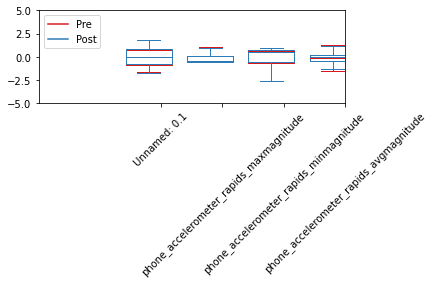

In [29]:
import matplotlib.pyplot as plt
import numpy as np

ticks = list(df_treat_pre.columns)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

df_treat_pre = df_treat_pre.iloc[:,:6]
df_treat_post = df_treat_post.iloc[:,:6]

bpl = plt.boxplot(df_treat_pre, positions=np.array(range(df_treat_pre.shape[1]))*2.0-0.4 , sym='', widths=1.5) #positions=np.array(range(df_treat_pre.shape[1]))*10.0-1.7
bpr = plt.boxplot(df_treat_post, positions=np.array(range(df_treat_post.shape[1]))*2.0-0.4 , sym='', widths=1.5)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Pre')
plt.plot([], c='#2C7BB6', label='Post')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2),list(df_treat_pre.columns ), rotation=45) #ticks 
#plt.xticks([])
plt.xlim(-4, len(ticks))
plt.ylim(-5, 5)
plt.tight_layout()
#plt.figure(figsize=(200,150))
#plt.savefig('boxcompare.png', bbox_inches='tight')

/tmp/ipykernel_1566330/2253512277.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( labels_list, rotation=0 )


ValueError: List of boxplot statistics and `positions` values must have same the length

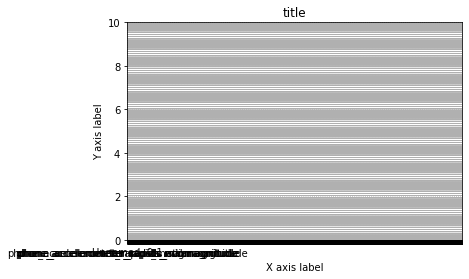

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# --- Combining your data:
data_group1 = df_treat_pre.iloc[:,:6]
data_group2 = df_treat_post.iloc[:,:6]

# --- Labels for your data:
labels_list = list(df_treat_pre.columns )
xlocations  = range(len(data_group1))
width       = 0.3
symbol      = 'r+'
ymin        = 0
ymax        = 10

ax = plt.gca()
ax.set_ylim(ymin,ymax)
ax.set_xticklabels( labels_list, rotation=0 )
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)
ax.set_xticks(xlocations)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('title')

# --- Offset the positions per group:
positions_group1 = [x-(width+0.01) for x in xlocations]
positions_group2 = xlocations

plt.boxplot(data_group1, 
            sym=symbol,
            labels=['']*len(labels_list),
            positions=positions_group1, 
            widths=width, 
#           notch=False,  
#           vert=True, 
#           whis=1.5,
#           bootstrap=None, 
#           usermedians=None, 
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.boxplot(data_group2, 
            labels=labels_list,
            sym=symbol,
            positions=positions_group2, 
            widths=width, 
#           notch=False,  
#           vert=True, 
#           whis=1.5,
#           bootstrap=None, 
#           usermedians=None, 
#           conf_intervals=None,
#           patch_artist=False,
            )

#plt.savefig('boxplot_grouped.png')  
#plt.savefig('boxplot_grouped.pdf')    # when publishing, use high quality PDFs
plt.show()   

In [ ]:
plot_lags(df.loc[df['pid'] == 'p102'  ,'phone_accelerometer_rapids_avgmagnitude'])

RangeIndex(start=0, stop=4, step=1)

## Non-linear dimensionality reduction on features at population level: UMAP
First, compute the mean for each feature and for each participant. With this reduced data matrix, make a visualization to highlight potential class separations 

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import umap

/home/jmocel/.conda/envs/SktimeEnv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('/home/jmocel/trelium/rapids/data/data/processed/features/all_participants/all_sensor_features_clean_withtarget_all_foravi.csv')

excluded_cols = ['Unnamed: 0.1','Unnamed: 0',
                #'percentage_change_hama','percentage_change_oasis','percentage_change_bai',
                #'hama_nonclinical_post','oasis_nonclinical_post','bai_nonclinical_post',
                #'OASIS_RCI_responder',
                'OASIS_strict_responder',
                'HAMA','OASIS','BAI',
                #'pid',
                'segment_end_date',
                'local_segment',
                'local_segment_label',
                'local_segment_start_datetime',
                'local_segment_end_datetime',
                'phone_data_yield_rapids_ratiovalidyieldedminutes',
                'phone_data_yield_rapids_ratiovalidyieldedhours',
                'sensing_period',
                'exp_group']
additional_drop = ['phone_bluetooth_doryab_countscansleastfrequentdeviceacrossdatasetown', 'phone_bluetooth_doryab_countscansmostfrequentdeviceacrossdatasetothers','phone_locations_doryab_homelabel','OASIS_RCI_responder']

Y = df.groupby('pid')['OASIS_RCI_responder'].apply(lambda x: np.unique(x))
df = df.drop(columns=excluded_cols+additional_drop)
df = df.groupby('pid').mean()
df = df.reset_index()
participants = df[['pid']]
df = df.drop(columns=['pid'])
df = df.transform(lambda x: (x - x.mean()) / x.std())
X = df.to_numpy()

In [3]:
df.shape

(33, 90)

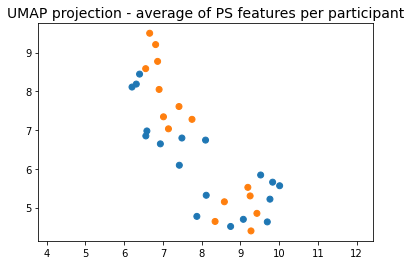

In [13]:
reducer = umap.UMAP(n_neighbors=4, min_dist=0.0001)
embedding = reducer.fit_transform(X)


plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x[0]] for x in Y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection - average of PS features per participant', fontsize=14)
plt.savefig('UMAP_all.png',dpi = 1000)